In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud
import re
# Загрузите данные из файла Excel
df = pd.read_excel('../data/processed/analiz.xlsx')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      161 non-null    int64  
 1   name                    161 non-null    object 
 2   area                    161 non-null    object 
 3   salary                  41 non-null     float64
 4   valuta                  41 non-null     object 
 5   alternate_url           161 non-null    object 
 6   employer_name           161 non-null    object 
 7   snippet_requirement     160 non-null    object 
 8   snippet_responsibility  160 non-null    object 
 9   schedule                161 non-null    object 
 10  working_time_intervals  0 non-null      float64
 11  professional_roles      161 non-null    object 
 12  experience              161 non-null    object 
 13  employment              161 non-null    object 
 14  published_at            161 non-null    ob

<h3>Определим самую раннюю и самую позднюю даты публикации вакансий Аналитик данных</h3>

In [3]:
# Преобразуйте столбец 'published_at' в формат datetime
df['published_at'] = pd.to_datetime(df['published_at'])

In [4]:
# Найдём самую раннюю дату публикации
earliest_date = df['published_at'].min()
print("Самая ранняя дата публикации:", earliest_date)

Самая ранняя дата публикации: 2024-06-10 06:02:00+03:00


In [5]:
# Найдём самую позднюю дату публикации
latest_date = df['published_at'].max()
print("Самая поздняя дата публикации:", latest_date)

Самая поздняя дата публикации: 2024-07-08 13:21:07+03:00


<h3>Опредилим разброс зарплат (минимальная. максимальная и среднее значение)</h3>

Минимальная зарплата: 60000.0
Максимальная зарплата: 350000.0
Средняя зарплата: 159034.1463414634


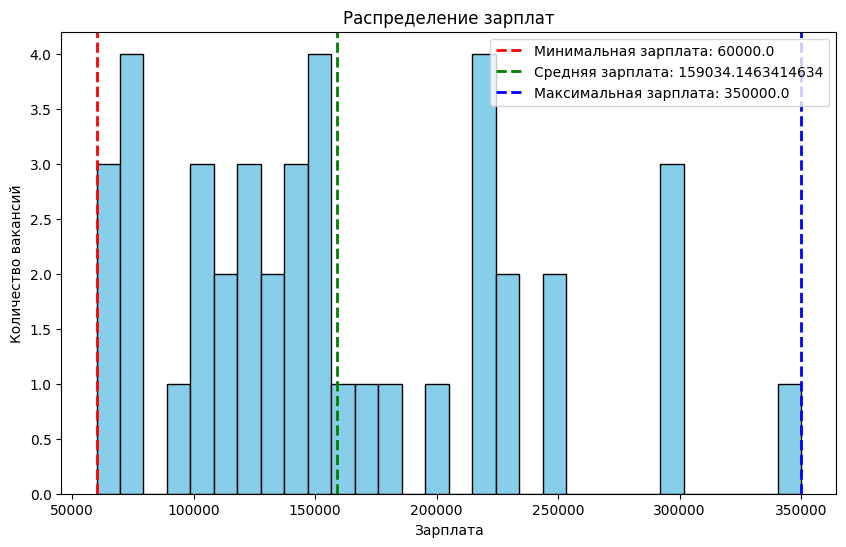

In [6]:
# Минимальное значение зарплаты
min_salary = df['salary'].min()
print("Минимальная зарплата:", min_salary)

# Максимальное значение зарплаты
max_salary = df['salary'].max()
print("Максимальная зарплата:", max_salary)

# Среднее значение зарплаты
mean_salary = df['salary'].mean()
print("Средняя зарплата:", mean_salary)

# Визуализация

# Создание фигуры и оси
fig, ax = plt.subplots(figsize=(10, 6))

# Построение гистограммы зарплат
ax.hist(df['salary'], bins=30, color='skyblue', edgecolor='black')

# Добавление вертикальных линий для минимальной, средней и максимальной зарплат
ax.axvline(min_salary, color='red', linestyle='dashed', linewidth=2, label=f'Минимальная зарплата: {min_salary}')
ax.axvline(mean_salary, color='green', linestyle='dashed', linewidth=2, label=f'Средняя зарплата: {mean_salary}')
ax.axvline(max_salary, color='blue', linestyle='dashed', linewidth=2, label=f'Максимальная зарплата: {max_salary}')

# Добавление заголовка и меток осей
ax.set_title('Распределение зарплат')
ax.set_xlabel('Зарплата')
ax.set_ylabel('Количество вакансий')

# Добавление легенды
ax.legend()

# Показ графика
plt.show()

<h3>Проверим какие критерии опыта задают работодатели</h3>

In [7]:
print("\nРаспределение данных в категориальном столбце 'experience':")
print(df['experience'].value_counts())


Распределение данных в категориальном столбце 'experience':
experience
От 1 года до 3 лет    110
От 3 до 6 лет          33
Нет опыта              17
Более 6 лет             1
Name: count, dtype: int64


Минимальная зарплата: 60000.0
Максимальная зарплата: 142000.0
Средняя зарплата: 103000.0


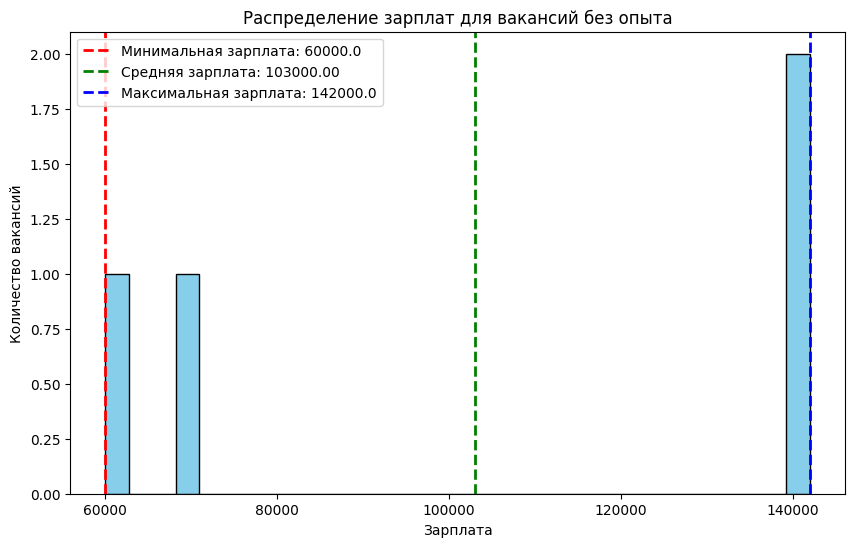

In [8]:
# Фильтруем DataFrame, чтобы включить только строки, где 'experience' равен 'Нет опыта'
no_experience_df = df[df['experience'] == 'Нет опыта']
# Рассчитываем минимальное, максимальное и среднее значение зарплаты для вакансий 'Нет опыта'
min_salary = no_experience_df['salary'].min()
max_salary = no_experience_df['salary'].max()
avg_salary = no_experience_df['salary'].mean()

print("Минимальная зарплата:", min_salary)
print("Максимальная зарплата:", max_salary)
print("Средняя зарплата:", avg_salary)

# Визуализация
plt.figure(figsize=(10, 6))

# Гистограмма зарплат для вакансий без опыта
plt.hist(no_experience_df['salary'], bins=30, color='skyblue', edgecolor='black')

# Добавление вертикальных линий для минимальной, средней и максимальной зарплат
plt.axvline(min_salary, color='red', linestyle='dashed', linewidth=2, label=f'Минимальная зарплата: {min_salary}')
plt.axvline(avg_salary, color='green', linestyle='dashed', linewidth=2, label=f'Средняя зарплата: {avg_salary:.2f}')
plt.axvline(max_salary, color='blue', linestyle='dashed', linewidth=2, label=f'Максимальная зарплата: {max_salary}')

# Добавление заголовка и меток осей
plt.title('Распределение зарплат для вакансий без опыта')
plt.xlabel('Зарплата')
plt.ylabel('Количество вакансий')

# Добавление легенды
plt.legend()

# Показ графика
plt.show()

Минимальная зарплата: 60000.0
Максимальная зарплата: 300000.0
Средняя зарплата: 159136.0


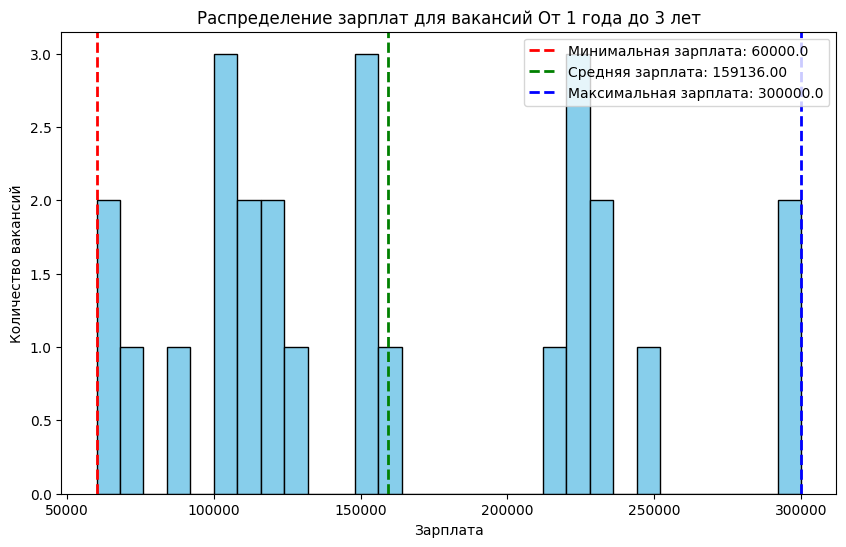

In [9]:
# Фильтруем DataFrame, чтобы включить только строки, где 'experience' равен 'От 1 года до 3 лет'
no_experience_df = df[df['experience'] == 'От 1 года до 3 лет']
# Рассчитываем минимальное, максимальное и среднее значение зарплаты для вакансий 'От 1 года до 3 лет'
min_salary = no_experience_df['salary'].min()
max_salary = no_experience_df['salary'].max()
avg_salary = no_experience_df['salary'].mean()

print("Минимальная зарплата:", min_salary)
print("Максимальная зарплата:", max_salary)
print("Средняя зарплата:", avg_salary)

# Визуализация
plt.figure(figsize=(10, 6))

# Гистограмма зарплат для вакансий без опыта
plt.hist(no_experience_df['salary'], bins=30, color='skyblue', edgecolor='black')

# Добавление вертикальных линий для минимальной, средней и максимальной зарплат
plt.axvline(min_salary, color='red', linestyle='dashed', linewidth=2, label=f'Минимальная зарплата: {min_salary}')
plt.axvline(avg_salary, color='green', linestyle='dashed', linewidth=2, label=f'Средняя зарплата: {avg_salary:.2f}')
plt.axvline(max_salary, color='blue', linestyle='dashed', linewidth=2, label=f'Максимальная зарплата: {max_salary}')

# Добавление заголовка и меток осей
plt.title('Распределение зарплат для вакансий От 1 года до 3 лет')
plt.xlabel('Зарплата')
plt.ylabel('Количество вакансий')

# Добавление легенды
plt.legend()

# Показ графика
plt.show()

Минимальная зарплата: 70000.0
Максимальная зарплата: 350000.0
Средняя зарплата: 177500.0


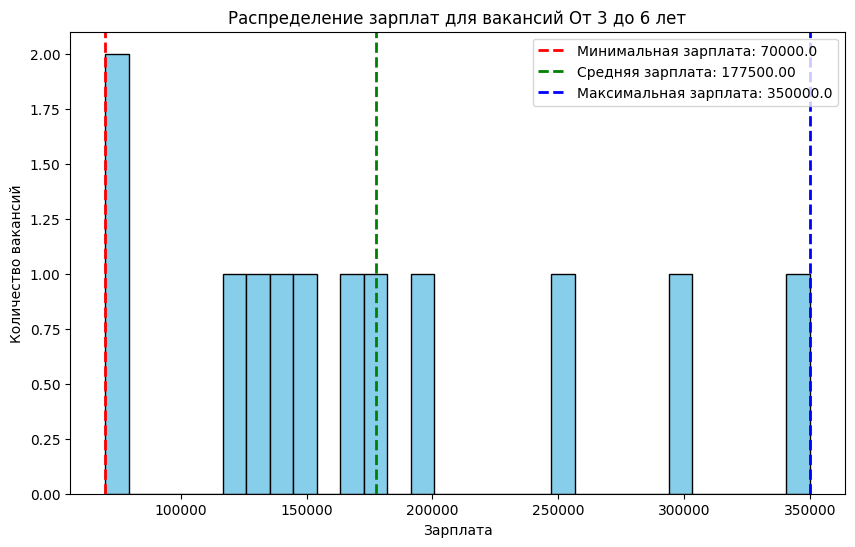

In [10]:
# Фильтруем DataFrame, чтобы включить только строки, где 'experience' равен 'От 3 до 6 лет'
no_experience_df = df[df['experience'] == 'От 3 до 6 лет']
# Рассчитываем минимальное, максимальное и среднее значение зарплаты для вакансий 'От 3 до 6 лет'
min_salary = no_experience_df['salary'].min()
max_salary = no_experience_df['salary'].max()
avg_salary = no_experience_df['salary'].mean()

print("Минимальная зарплата:", min_salary)
print("Максимальная зарплата:", max_salary)
print("Средняя зарплата:", avg_salary)

# Визуализация
plt.figure(figsize=(10, 6))

# Гистограмма зарплат для вакансий без опыта
plt.hist(no_experience_df['salary'], bins=30, color='skyblue', edgecolor='black')

# Добавление вертикальных линий для минимальной, средней и максимальной зарплат
plt.axvline(min_salary, color='red', linestyle='dashed', linewidth=2, label=f'Минимальная зарплата: {min_salary}')
plt.axvline(avg_salary, color='green', linestyle='dashed', linewidth=2, label=f'Средняя зарплата: {avg_salary:.2f}')
plt.axvline(max_salary, color='blue', linestyle='dashed', linewidth=2, label=f'Максимальная зарплата: {max_salary}')

# Добавление заголовка и меток осей
plt.title('Распределение зарплат для вакансий От 3 до 6 лет')
plt.xlabel('Зарплата')
plt.ylabel('Количество вакансий')

# Добавление легенды
plt.legend()

# Показ графика
plt.show()

<h3>Проверим какими наваками должен обладать аналитик данных, и их градацию</h3>

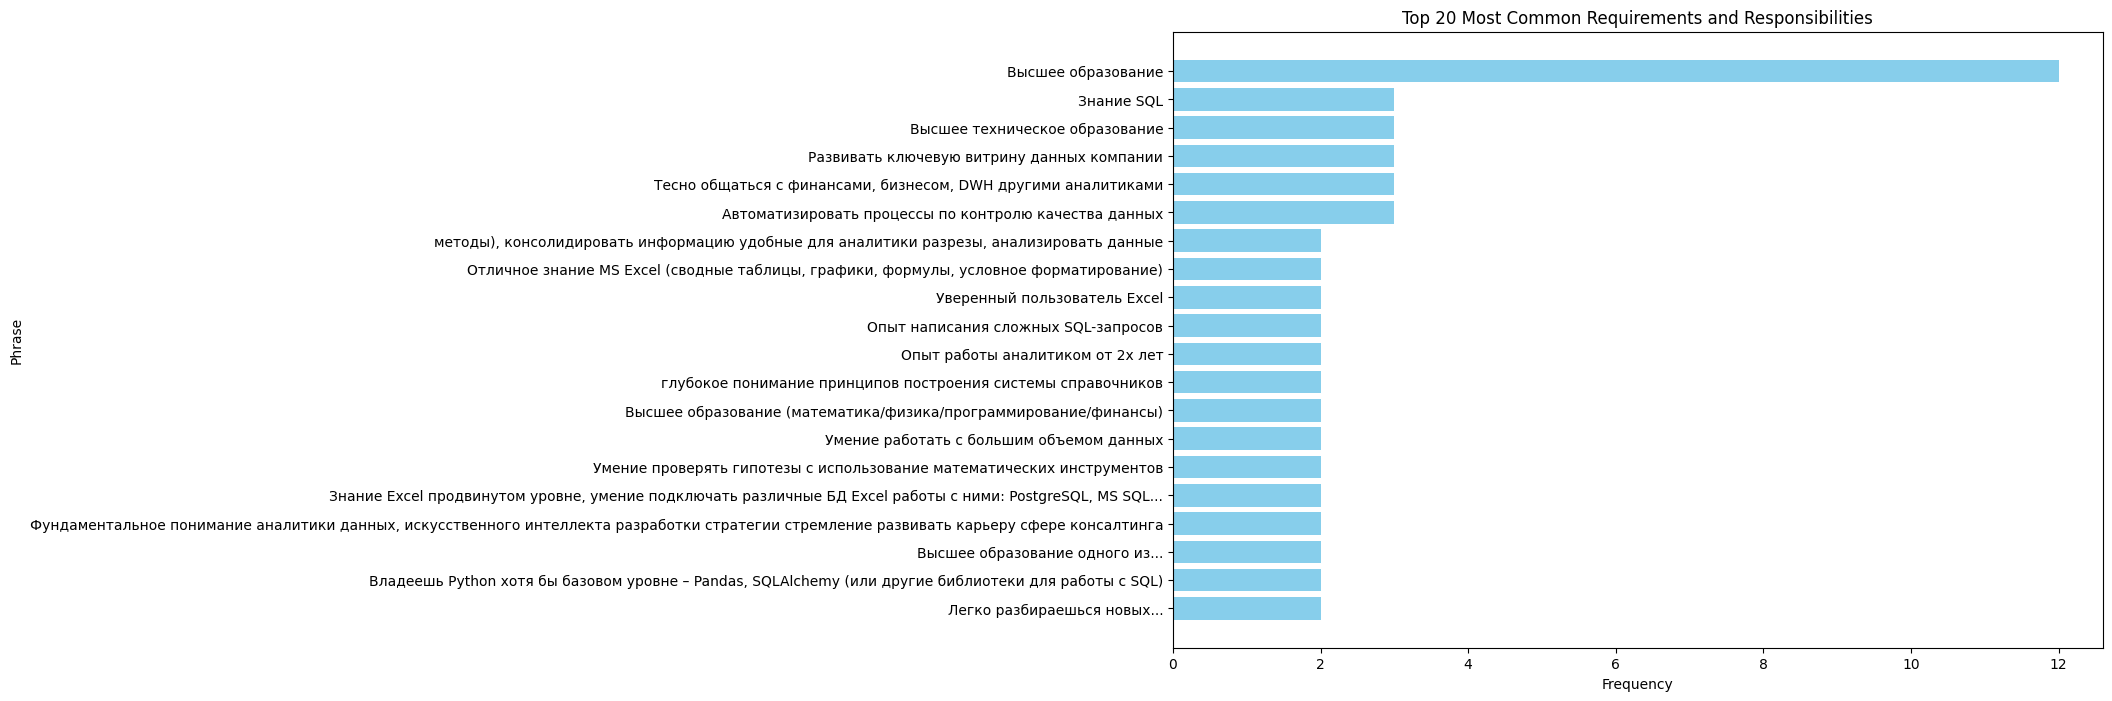

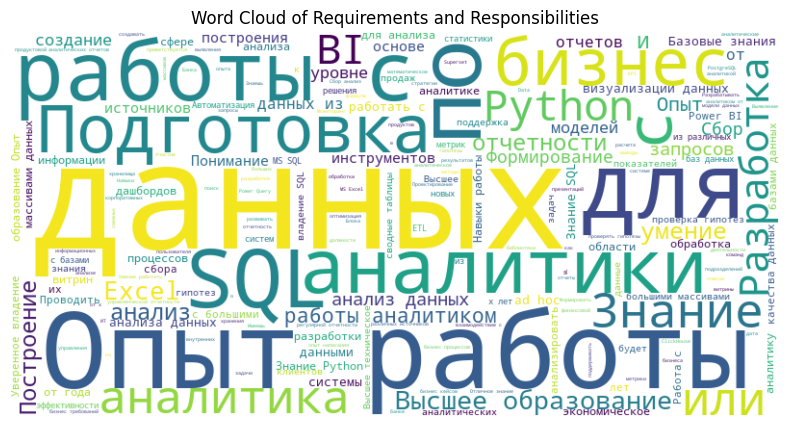

In [11]:
# Проверяем наличие пропущенных значений в столбцах
df['snippet_requirement'].isnull().sum()  # выводит количество пропущенных значений в столбце snippet_requirement
df['snippet_responsibility'].isnull().sum()  # выводит количество пропущенных значений в столбце snippet_responsibility

# заполняем пропущенные значения словом "пусто"
df = df.assign(snippet_requirement=df['snippet_requirement'].fillna('пусто'), snippet_responsibility=df['snippet_responsibility'].fillna('пусто'))

# Объедините колонки в единый список
combined_list = pd.concat([df['snippet_requirement'], df['snippet_responsibility']]).tolist()

# Удаляем все тэги '<highlighttext>' и '</highlighttext>'
combined_list = [item.replace('<highlighttext>', '').replace('</highlighttext>', '') for item in combined_list]

# Приводим список к единой системе разбиения
new_list = [item.split('. ') if '.' in item else item.split(', ') for item in combined_list]
final_list = [item for sublist in new_list for item in sublist]

# Задаем список предлогов и знаков тире
prepositions_and_symbols = ['в', 'на', 'и', '-']
# Функция для удаления предлогов и знаков тире
def clean_list(lst, stopwords):
    cleaned_list = []
    for phrase in lst:
        # Удаляем предлоги и знаки тире
        cleaned_phrase = ' '.join([word for word in phrase.split() if word.lower() not in stopwords])
        # Удаляем лишние пробелы
        cleaned_phrase = re.sub(' +', ' ', cleaned_phrase).strip()
        # Проверяем, содержит ли фраза два или более слов
        if len(cleaned_phrase.split()) >= 2:
            cleaned_list.append(cleaned_phrase)
    return cleaned_list

# Очистка списка
final_list = clean_list(final_list, prepositions_and_symbols)

# Считаем частоту встречаемости слов и фраз
counter = collections.Counter(final_list)
most_common = counter.most_common(20)  # топ-20 наиболее частых слов и фраз

# Создаем DataFrame для удобства визуализации
common_df = pd.DataFrame(most_common, columns=['Phrase', 'Frequency'])

# Визуализируем данные
plt.figure(figsize=(12, 8))
plt.barh(common_df['Phrase'], common_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Phrase')
plt.title('Top 20 Most Common Requirements and Responsibilities')
plt.gca().invert_yaxis()
plt.show()

# Генерация облака слов
wordcloud_text = ' '.join(final_list)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Requirements and Responsibilities')
plt.axis('off')
plt.show()
